**Analisar as vendas e avaliações de produtos na Amazon para validar hipóteses sobre descontos e classificações.**

**Coleta e limpeza dos dados**

**Análise exploratória de dados (EDA)**



In [ ]:
# importar pandas e tabelas
import pandas as pd
product = pd.read_csv('/content/amazon - amazon_product.csv')
review = pd.read_csv('/content/amazon - amazon_review.csv')
product.info()
review.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1469 non-null   object
 1   product_name         1469 non-null   object
 2   category             1469 non-null   object
 3   discounted_price     1469 non-null   object
 4   actual_price         1469 non-null   object
 5   discount_percentage  1469 non-null   object
 6   about_product        1465 non-null   object
dtypes: object(7)
memory usage: 80.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         1465 non-null   object
 1   user_name       1465 non-null   object
 2   review_id       1465 non-null   object
 3   review_title    1465 non-null   object
 4   review_content  1465 non-null   obje

In [ ]:
product

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,High Compatibility : Compatible With iPhone 12...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,"Compatible with all Type C enabled devices, be..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,【 Fast Charger& Data Sync】-With built-in safet...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,The boAt Deuce USB 300 2 in 1 cable is compati...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,[CHARGE & SYNC FUNCTION]- This cable comes wit...
...,...,...,...,...,...,...,...
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,863","₹3,690",22%,"Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W..."
1465,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,NaN
1466,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,NaN
1467,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,NaN


In [ ]:
review

,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,B07JW9H4J1,4.2,"24,269"
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,B098NS6PVG,4,"43,994"
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,B096MSW6CT,3.9,"7,928"
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,B08HDJ86NZ,4.2,"94,363"
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,B08CF3B7N1,4.2,"16,905"
...,...,...,...,...,...,...,...,...,...,...
1460,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",NaN,NaN,B08L7J3T31,4,"1,090"
1461,"AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",NaN,NaN,B01M6453MB,4.1,"4,118"
1462,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",NaN,NaN,B009P2LIL4,3.6,468
1463,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,NaN,NaN,B00J5DYCCA,4,"8,031"


In [ ]:
# Verificar valores ausentes
print(product.isnull().sum())
print(review.isnull().sum())

# Preenchendo ou removendo valores ausentes
#product.fillna({'discounted_price': product['discounted_price'].mean(), 'discount_percentage': 0}, inplace=True)
#review.dropna(subset=['rating'], inplace=True)

# Verificando tipos de dados
print(product.dtypes)
print(review.dtypes)


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
about_product          4
dtype: int64
user_id             0
user_name           0
review_id           0
review_title        0
review_content      0
img_link          466
product_link      466
product_id          0
rating              0
rating_count        2
dtype: int64
product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
about_product          object
dtype: object
user_id           object
user_name         object
review_id         object
review_title      object
review_content    object
img_link          object
product_link      object
product_id        object
rating            object
rating_count      object
dtype: object


In [ ]:
# Estatísticas descritivas
print(product.describe())
print(review.describe())


        product_id                                       product_name  \
count         1469                                               1469   
unique        1351                                               1337   
top     B07JW9H4J1  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1469             1469   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...             ₹199   
freq                                                  233               53   

       actual_price discount_percentage  \
count          1469                1469   
unique          449                  92   
top            ₹999                 50%   
freq            120                  56   

                           

In [ ]:
# Verificar dados duplicados
duplicated_rows = product[product.duplicated()]
print("Número de linhas duplicadas producto:", len(duplicated_rows))

# Verificar dados duplicados
duplicated_rows = review[review.duplicated()]
print("Número de linhas duplicadas review:", len(duplicated_rows))

Número de linhas duplicadas producto: 106
Número de linhas duplicadas review: 0


In [ ]:
# Verificar duplicatas em todas as colunas
#duplicated_rows = product[product.duplicated()]

# Verificar quais colunas têm valores duplicados
duplicate_columns = {}
for col in product.columns:
    duplicated = product.duplicated(subset=[col])
    num_duplicates = duplicated.sum()
    if num_duplicates > 0:
        duplicate_columns[col] = num_duplicates

print("Colunas com valores duplicados e seus respectivos números de duplicatas:")
for col, num_duplicates in duplicate_columns.items():
    print(f"{col}: {num_duplicates}")



Colunas com valores duplicados e seus respectivos números de duplicatas:
product_id: 118
product_name: 132
category: 1258
discounted_price: 919
actual_price: 1020
discount_percentage: 1377
about_product: 175


In [ ]:
import numpy as np

# Converter colunas numéricas para float
product['discounted_price'] = product['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
product['actual_price'] = product['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
product['discount_percentage'] = product['discount_percentage'].str.rstrip('%').astype(float)
review['rating'] = review['rating'].str.replace('|', '').replace('', np.nan).astype(float)
review['rating_count'] = review['rating_count'].replace('', np.nan).replace(',', '', regex=True).astype(float)

# Verificar as mudanças
print(product.info())
print(review.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1469 non-null   object 
 1   product_name         1469 non-null   object 
 2   category             1469 non-null   object 
 3   discounted_price     1469 non-null   float64
 4   actual_price         1469 non-null   float64
 5   discount_percentage  1469 non-null   float64
 6   about_product        1465 non-null   object 
dtypes: float64(3), object(4)
memory usage: 80.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         1465 non-null   object 
 1   user_name       1465 non-null   object 
 2   review_id       1465 non-null   object 
 3   review_title    1465 non-null   object 
 4   revi

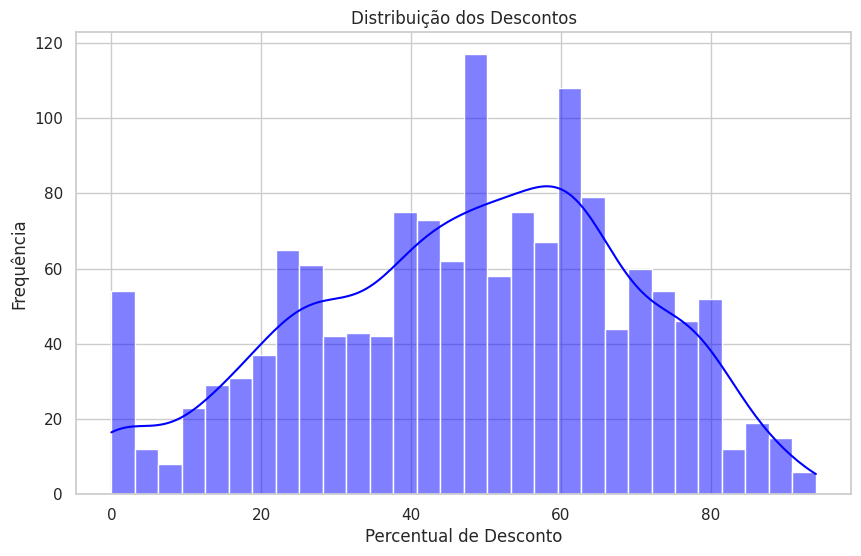

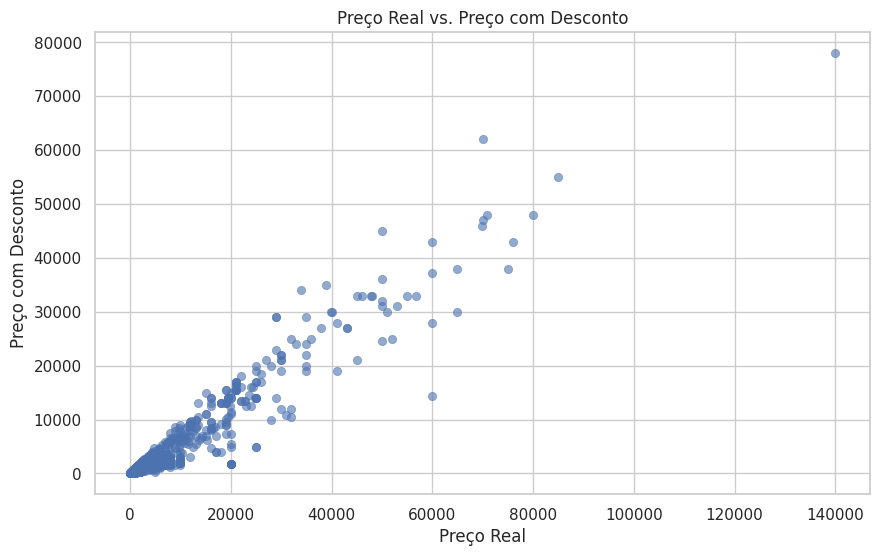

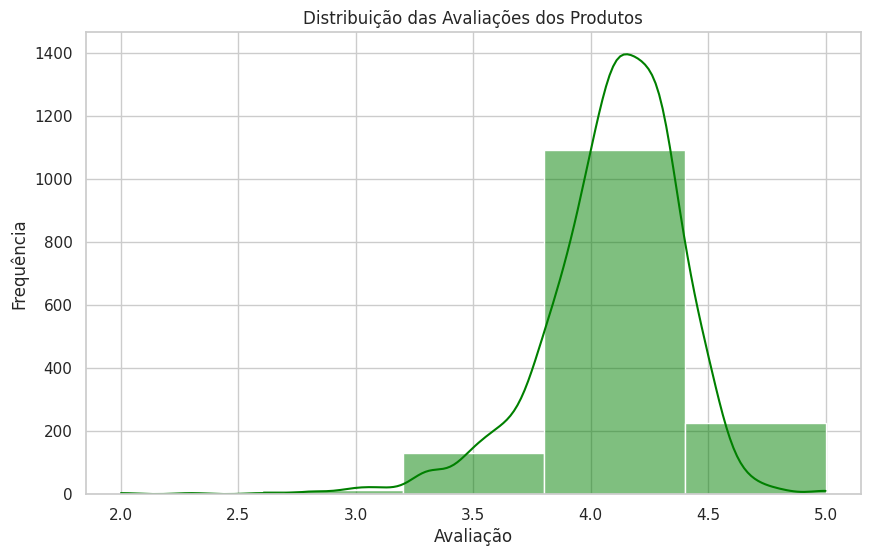

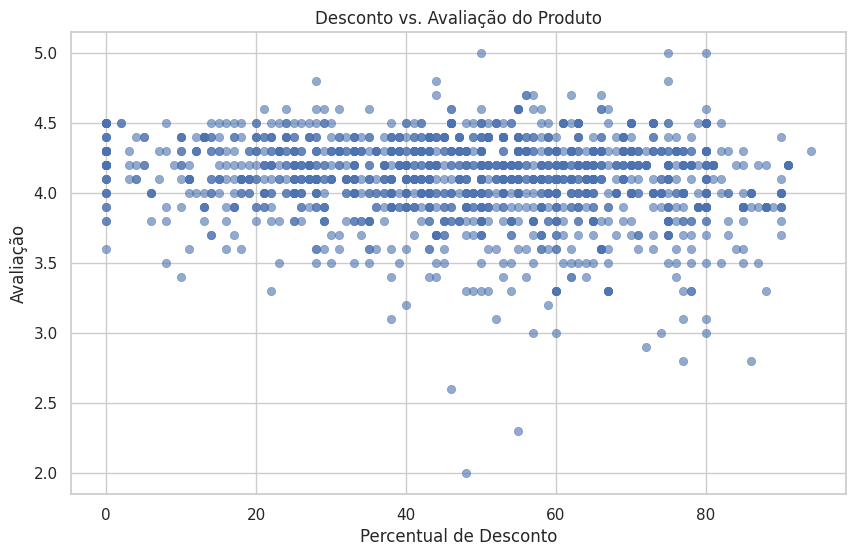

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações de estilo
sns.set(style="whitegrid")

# Distribuição dos descontos
plt.figure(figsize=(10, 6))
sns.histplot(product['discount_percentage'], bins=30, kde=True, color='blue')
plt.title('Distribuição dos Descontos')
plt.xlabel('Percentual de Desconto')
plt.ylabel('Frequência')
plt.show()

# Relação entre preço real e preço com desconto
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='discounted_price', data=product, alpha=0.6, edgecolor=None)
plt.title('Preço Real vs. Preço com Desconto')
plt.xlabel('Preço Real')
plt.ylabel('Preço com Desconto')
plt.show()

# Distribuição das avaliações
plt.figure(figsize=(10, 6))
sns.histplot(review['rating'], bins=5, kde=True, color='green')
plt.title('Distribuição das Avaliações dos Produtos')
plt.xlabel('Avaliação')
plt.ylabel('Frequência')
plt.show()

# Relação entre desconto e avaliação
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_percentage', y='rating', data=pd.merge(product, review, on='product_id'), alpha=0.6, edgecolor=None)
plt.title('Desconto vs. Avaliação do Produto')
plt.xlabel('Percentual de Desconto')
plt.ylabel('Avaliação')
plt.show()



In [ ]:
# Estatísticas descritivas
print(product.describe())
print(review.describe())


       discounted_price   actual_price  discount_percentage
count       1469.000000    1469.000000          1469.000000
mean        3122.764758    5438.132253            47.630361
std         6935.061749   10860.847741            21.638350
min           39.000000      39.000000             0.000000
25%          325.000000     800.000000            32.000000
50%          799.000000    1690.000000            50.000000
75%         1999.000000    4295.000000            63.000000
max        77990.000000  139900.000000            94.000000
            rating   rating_count
count  1464.000000    1463.000000
mean      4.096585   18295.541353
std       0.291674   42753.864952
min       2.000000       2.000000
25%       4.000000    1186.000000
50%       4.100000    5179.000000
75%       4.300000   17336.500000
max       5.000000  426973.000000


In [ ]:
# Juntar as tabelas product e review usando a coluna product_id como chave de junção
amazon = pd.merge(product, review, on='product_id', how='inner')

# Verificar se há valores nulos após a junção
print(amazon.isnull().sum())

# Exibir as primeiras linhas do DataFrame resultante
print(amazon.info())

# Verificar dados duplicados
duplicated_rows = amazon[amazon.duplicated()]
print("\nNúmero de linhas duplicadas:", len(duplicated_rows))

product_id               0
product_name             0
category                 0
discounted_price         0
actual_price             0
discount_percentage      0
about_product            4
user_id                  0
user_name                0
review_id                0
review_title             0
review_content           0
img_link               476
product_link           476
rating                   1
rating_count             2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1741 non-null   object 
 1   product_name         1741 non-null   object 
 2   category             1741 non-null   object 
 3   discounted_price     1741 non-null   float64
 4   actual_price         1741 non-null   float64
 5   discount_percentage  1741 non-null   float64
 6   about_product        1737 non-null   object

In [ ]:
# Verificar quais colunas têm valores duplicados
duplicate_columns = {}
for col in product.columns:
    duplicated = amazon.duplicated(subset=[col])
    num_duplicates = duplicated.sum()
    if num_duplicates > 0:
        duplicate_columns[col] = num_duplicates

print("Colunas com valores duplicados e seus respectivos números de duplicatas:")
for col, num_duplicates in duplicate_columns.items():
    print(f"{col}: {num_duplicates}")

Colunas com valores duplicados e seus respectivos números de duplicatas:
product_id: 390
product_name: 404
category: 1530
discounted_price: 1191
actual_price: 1292
discount_percentage: 1649
about_product: 447


In [ ]:
# Remover linhas duplicadas com base na coluna product_id
amazon = amazon.drop_duplicates(subset='product_id')

# Remover duplicatas
#amazon = amazon.drop_duplicates()

# Verificar a estrutura do DataFrame após remover duplicatas
print(amazon.info())

# Verificar dados duplicados
duplicated_rows = amazon[amazon.duplicated()]
print("\nNúmero de linhas duplicadas:", len(duplicated_rows))

<class 'pandas.core.frame.DataFrame'>
Index: 1351 entries, 0 to 1739
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1351 non-null   object 
 1   product_name         1351 non-null   object 
 2   category             1351 non-null   object 
 3   discounted_price     1351 non-null   float64
 4   actual_price         1351 non-null   float64
 5   discount_percentage  1351 non-null   float64
 6   about_product        1351 non-null   object 
 7   user_id              1351 non-null   object 
 8   user_name            1351 non-null   object 
 9   review_id            1351 non-null   object 
 10  review_title         1351 non-null   object 
 11  review_content       1351 non-null   object 
 12  img_link             891 non-null    object 
 13  product_link         891 non-null    object 
 14  rating               1350 non-null   float64
 15  rating_count         1349 non-null   float6

In [ ]:
# trocar null pela mediana de 4 variavel
amazon[['rating_count', 'rating']] = amazon[['rating_count', 'rating']].fillna(amazon[['rating_count', 'rating']].median())
#amazon['rating'] = amazon['rating'].fillna(amazon['rating'].median())


# Selecionar apenas as colunas numéricas
numeric_columns = amazon.select_dtypes(include=['number'])

# Calcular os quartis apenas para as colunas numéricas
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir os limites superior e inferior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers em cada coluna numérica
outliers = (numeric_columns < limite_inferior) | (numeric_columns > limite_superior)

# Contar o número de outliers em cada coluna
num_outliers = outliers.sum()

# Exibir o número de outliers em cada coluna
print(f'Numero de Outliers: \n{num_outliers}')
print(amazon.isnull().sum())

Numero de Outliers: 
discounted_price       209
actual_price           185
discount_percentage      0
rating                  19
rating_count           130
dtype: int64
product_id               0
product_name             0
category                 0
discounted_price         0
actual_price             0
discount_percentage      0
about_product            0
user_id                  0
user_name                0
review_id                0
review_title             0
review_content           0
img_link               460
product_link           460
rating                   0
rating_count             0
dtype: int64


In [ ]:
# Separar a coluna 'category' e manter apenas o primeiro valor antes da vírgula
amazon['category'] = amazon['category'].apply(lambda x: x.split('|')[0].strip())

# Contar categorias únicas
unique_categories = amazon['category'].nunique()

# Exibir o número de categorias únicas
print(f"Total de categorias únicas: \n{unique_categories}")

# Contar a frequência de cada categoria
category_counts = amazon['category'].value_counts()

# Exibir a frequência de cada categoria
print(f"\nTotal de Frecuencia:   \n{category_counts}")

Total de categorias únicas: 
9

Total de Frecuencia:   
category
Electronics              490
Home&Kitchen             448
Computers&Accessories    375
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64


**Segmentação por categoria de produto e faixa de desconto.**

In [ ]:
# Segmentar por número (bins)
amazon['discount_segment_bins'] = pd.qcut(amazon['discount_percentage'], 4, labels=[0, 1, 2, 3])

# Segmentar por quartis com rótulos apropriados
amazon['discount_segment'] = pd.qcut(amazon['discount_percentage'], 4, labels=['0-25%', '26-50%', '51-75%', '76-100%'])

# Exibir as primeiras linhas para verificar
print(amazon.head())

# Verificar valores nulos
print(amazon.isnull().sum())

    product_id                                       product_name  \
0   B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
9   B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
18  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
27  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
36  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                 category  discounted_price  actual_price  \
0   Computers&Accessories             399.0        1099.0   
9   Computers&Accessories             199.0         349.0   
18  Computers&Accessories             199.0        1899.0   
27  Computers&Accessories             329.0         699.0   
36  Computers&Accessories             154.0         399.0   

    discount_percentage                                      about_product  \
0                  64.0  High Compatibility : Compatible With iPhone 12...   
9                  43.0  Compatible with all Type C enabled de

In [ ]:
# Verificar os valores únicos na coluna 'discount_segment_bins' antes da conversão
print(amazon['discount_segment_bins'].unique())

# Converter a coluna 'discount_segment' para o tipo 'int64'
amazon['discount_segment_bins'] = amazon['discount_segment_bins'].astype('int64')

# Verificar o tipo da coluna após a conversão
print(amazon['discount_segment_bins'].dtype)
amazon.isnull().sum()


[3, 1, 2, 0]
Categories (4, int64): [0 < 1 < 2 < 3]
int64


product_id                 0
product_name               0
category                   0
discounted_price           0
actual_price               0
discount_percentage        0
about_product              0
user_id                    0
user_name                  0
review_id                  0
review_title               0
review_content             0
img_link                 460
product_link             460
rating                     0
rating_count               0
discount_segment_bins      0
discount_segment           0
dtype: int64

**Segmentação por Estatísticas Descritivas:**
Calculamos a média de desconto por categoria.
Criamos segmentos de categorias com base na média de desconto usando quartis (qcut).
Mesclamos esses segmentos de volta ao DataFrame original.

**Segmentação por Clustering:**
Calculamos estatísticas agregadas por categoria (média de preço com desconto, preço atual, percentual de desconto e avaliação).
Normalizamos os dados para clustering usando StandardScaler.
Aplicamos K-means clustering para criar grupos de categorias.
Mesclamos os clusters de volta ao DataFrame original.

O K-means é um algoritmo de clustering (agrupamento) não supervisionado que particiona um conjunto de dados em K clusters distintos, onde cada ponto de dados pertence ao cluster com a média (centroide) mais próxima

In [ ]:
# Calcular a média e a mediana de desconto por categoria
category_stats = amazon.groupby('category').agg({
    'discount_percentage': ['mean', 'median'],
    'discounted_price': ['mean', 'median'],
    'actual_price': ['mean', 'median'],
    'rating': ['mean', 'median'],
    'rating_count': ['mean', 'median']
}).reset_index()

category_stats.columns = ['category', 'mean_discount', 'median_discount', 'mean_discounted_price', 'median_discounted_price', 'mean_actual_price', 'median_actual_price', 'mean_rating', 'median_rating', 'mean_rating_count', 'median_rating_count']

# Criar segmentos com base na média de desconto (quartis)
category_stats['category_discount_segment'] = pd.qcut(category_stats['mean_discount'], 3, labels=['Low Discount', 'Medium Discount', 'High Discount'])

# Mesclar os segmentos de volta ao DataFrame original
amazon = amazon.merge(category_stats[['category', 'category_discount_segment']], on='category', how='left')

# Verificar as mudanças
amazon

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,rating,rating_count,discount_segment_bins,discount_segment,category_discount_segment
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399.0,1099.0,64.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,4.2,24269.0,3,76-100%,High Discount
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,199.0,349.0,43.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,4.0,43994.0,1,26-50%,High Discount
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,199.0,1899.0,90.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,3.9,7928.0,3,76-100%,High Discount
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,329.0,699.0,53.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,4.2,94363.0,2,51-75%,High Discount
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,154.0,399.0,61.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,4.2,16905.0,2,51-75%,High Discount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen,379.0,919.0,59.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",NaN,NaN,4.0,1090.0,2,51-75%,Low Discount
1347,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen,2280.0,3045.0,25.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",NaN,NaN,4.1,4118.0,0,0-25%,Low Discount
1348,B009P2LIL4,Bajaj Majesty RX10 2000 Watts H

In [ ]:
#Segmentação por Avaliação
# Calcular a média de classificação e o número de avaliações por produto
review_stats = amazon.groupby('product_id').agg({
    'rating': 'mean',
    'rating_count': 'mean'
}).reset_index()

review_stats.columns = ['product_id', 'mean_rating', 'mean_rating_count']

# Criar segmentos com base na média de classificação (quartis)
review_stats['rating_segment'] = pd.qcut(review_stats['mean_rating'], 3, labels=['Low Rating', 'Medium Rating', 'High Rating'])

# Criar segmentos com base no número de avaliações (quartis)
review_stats['rating_count_segment'] = pd.qcut(review_stats['mean_rating_count'], 3, labels=['Low Review Count', 'Medium Review Count', 'High Review Count'])

# Mesclar os segmentos de volta ao DataFrame original
amazon = amazon.merge(review_stats[['product_id', 'rating_segment', 'rating_count_segment']], on='product_id', how='left')

# Verificar as mudanças
print(amazon.head())


   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                category  discounted_price  actual_price  discount_percentage  \
0  Computers&Accessories             399.0        1099.0                 64.0   
1  Computers&Accessories             199.0         349.0                 43.0   
2  Computers&Accessories             199.0        1899.0                 90.0   
3  Computers&Accessories             329.0         699.0                 53.0   
4  Computers&Accessories             154.0         399.0                 61.0   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 1

In [ ]:
# Segmentação por Preço
# Calcular a média e a mediana dos preços por produto
price_stats = amazon.groupby('product_id').agg({
    'discounted_price': 'mean',
    'actual_price': 'mean'
}).reset_index()

price_stats.columns = ['product_id', 'mean_discounted_price', 'mean_actual_price']

# Criar segmentos com base na média de preço com desconto (quartis)
price_stats['discounted_price_segment'] = pd.qcut(price_stats['mean_discounted_price'], 3, labels=['Low Discounted Price', 'Medium Discounted Price', 'High Discounted Price'])

# Criar segmentos com base na média de preço real (quartis)
price_stats['actual_price_segment'] = pd.qcut(price_stats['mean_actual_price'], 3, labels=['Low Actual Price', 'Medium Actual Price', 'High Actual Price'])

# Mesclar os segmentos de volta ao DataFrame original
amazon = amazon.merge(price_stats[['product_id', 'discounted_price_segment', 'actual_price_segment']], on='product_id', how='left')

# Verificar as mudanças
print(amazon.head())


   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                category  discounted_price  actual_price  discount_percentage  \
0  Computers&Accessories             399.0        1099.0                 64.0   
1  Computers&Accessories             199.0         349.0                 43.0   
2  Computers&Accessories             199.0        1899.0                 90.0   
3  Computers&Accessories             329.0         699.0                 53.0   
4  Computers&Accessories             154.0         399.0                 61.0   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 1

In [ ]:
# Combinar segmentos de preço, desconto e avaliação
amazon['combined_segment'] = amazon['discounted_price_segment'].astype(str) + ' & ' + amazon['category_discount_segment'].astype(str) + ' & ' + amazon['actual_price_segment'].astype(str) +' & ' + amazon['rating_segment'].astype(str)

# Verificar as mudanças
amazon


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product,user_id,user_name,review_id,...,rating,rating_count,discount_segment_bins,discount_segment,category_discount_segment,rating_segment,rating_count_segment,discounted_price_segment,actual_price_segment,combined_segment
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399.0,1099.0,64.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",...,4.2,24269.0,3,76-100%,High Discount,Medium Rating,High Review Count,Low Discounted Price,Medium Actual Price,Low Discounted Price & High Discount & Medium ...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,199.0,349.0,43.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",...,4.0,43994.0,1,26-50%,High Discount,Low Rating,High Review Count,Low Discounted Price,Low Actual Price,Low Discounted Price & High Discount & Low Act...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,199.0,1899.0,90.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",...,3.9,7928.0,3,76-100%,High Discount,Low Rating,Medium Review Count,Low Discounted Price,Medium Actual Price,Low Discounted Price & High Discount & Medium ...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,329.0,699.0,53.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",...,4.2,94363.0,2,51-75%,High Discount,Medium Rating,High Review Count,Low Discounted Price,Low Actual Price,Low Discounted Price & High Discount & Low Act...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,154.0,399.0,61.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",...,4.2,16905.0,2,51-75%,High Discount,Medium Rating,High Review Count,Low Discounted Price,Low Actual Price,Low Discounted Price & High Discount & Low Act...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen,379.0,919.0,59.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",...,4.0,1090.0,2,51-75%,Low Discount,Low Rating,Low Review Count,Low Discounted Price,Low Actual Price,Low Discounted Price & Low Discount & Low Actu...
1347,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen,2280.0,3045.0,25.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",...,4.1,4118.0,0,0-25%,Low Discount,Medium Rating,Medium Review Count,High Discounted Price,High Actual Price,High Discounted Price & Low Discount & High Ac...
1348,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,Home&Kitchen,2219.0,3080.0,28.0,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",...,3.6,468.0,0,0-25%,Low Discount,Low Rating,Low Re

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Calcular estatísticas agregadas por categoria
category_stats = amazon.groupby('category').agg({
    'discounted_price': 'mean',
    'actual_price': 'mean',
    'discount_percentage': 'mean',
    'rating': 'mean'
}).reset_index()

# Normalizar os dados
scaler = StandardScaler()
category_stats_scaled = scaler.fit_transform(category_stats[['discounted_price', 'actual_price', 'discount_percentage', 'rating']])

# Aplicar K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
category_stats['category_cluster'] = kmeans.fit_predict(category_stats_scaled)

# Mesclar os clusters de volta ao DataFrame original
amazon = amazon.merge(category_stats[['category', 'category_cluster']], on='category', how='left')

# Exibir as primeiras linhas para verificar
#print(amazon.head())
amazon

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product,user_id,user_name,review_id,...,rating_count,discount_segment_bins,discount_segment,category_discount_segment,rating_segment,rating_count_segment,discounted_price_segment,actual_price_segment,combined_segment,category_cluster
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399.0,1099.0,64.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",...,24269.0,3,76-100%,High Discount,Medium Rating,High Review Count,Low Discounted Price,Medium Actual Price,Low Discounted Price & High Discount & Medium ...,0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,199.0,349.0,43.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",...,43994.0,1,26-50%,High Discount,Low Rating,High Review Count,Low Discounted Price,Low Actual Price,Low Discounted Price & High Discount & Low Act...,0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,199.0,1899.0,90.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",...,7928.0,3,76-100%,High Discount,Low Rating,Medium Review Count,Low Discounted Price,Medium Actual Price,Low Discounted Price & High Discount & Medium ...,0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,329.0,699.0,53.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",...,94363.0,2,51-75%,High Discount,Medium Rating,High Review Count,Low Discounted Price,Low Actual Price,Low Discounted Price & High Discount & Low Act...,0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,154.0,399.0,61.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",...,16905.0,2,51-75%,High Discount,Medium Rating,High Review Count,Low Discounted Price,Low Actual Price,Low Discounted Price & High Discount & Low Act...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen,379.0,919.0,59.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",...,1090.0,2,51-75%,Low Discount,Low Rating,Low Review Count,Low Discounted Price,Low Actual Price,Low Discounted Price & Low Discount & Low Actu...,0
1347,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen,2280.0,3045.0,25.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",...,4118.0,0,0-25%,Low Discount,Medium Rating,Medium Review Count,High Discounted Price,High Actual Price,High Discounted Price & Low Discount & High Ac...,0
1348,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,Home&Kitchen,2219.0,3080.0,28.0,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",...,468.0,0,0-25%,Low Discount,Low Rating,Low Review Cou

In [ ]:
# Estatísticas descritivas
print(amazon.describe())

       discounted_price   actual_price  discount_percentage       rating  \
count       1351.000000    1351.000000          1351.000000  1351.000000   
mean        3304.801754    5691.176625            46.685418     4.091858   
std         7173.975455   11218.666235            21.632611     0.297334   
min           39.000000      39.000000             0.000000     2.000000   
25%          349.000000     899.000000            31.000000     3.900000   
50%          899.000000    1795.000000            49.000000     4.100000   
75%         2174.000000    4575.000000            62.000000     4.300000   
max        77990.000000  139900.000000            94.000000     5.000000   

        rating_count  discount_segment_bins  category_cluster  
count    1351.000000            1351.000000       1351.000000  
mean    17625.390822               1.478905          0.749075  
std     42117.339550               1.124524          0.956048  
min         2.000000               0.000000          0.0000

In [ ]:
import plotly.express as px

# Verificar a contagem de cada cluster
print(amazon['category_cluster'].value_counts())

# Gráfico interativo para visualizar clusters
fig = px.scatter(amazon,
                 x='rating',
                 y='discounted_price',
                 color='category_cluster',
                 hover_data=['product_name', 'category'],
                 title='Clusters de Categorias Baseados em Preço com Desconto e Classificação',
                 labels={'discounted_price': 'Preço com Desconto (Média)', 'rating': 'Classificação (Média)'},
                 color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

category_cluster
0    829
2    490
1     32
Name: count, dtype: int64


In [ ]:
# Calcular a contagem de cada cluster
cluster_counts = amazon['category_cluster'].value_counts().reset_index()
cluster_counts.columns = ['category_cluster', 'count']

# Criar um gráfico de barras interativo para visualizar a distribuição de clusters
fig = px.bar(cluster_counts,
             x='category_cluster',
             y='count',
             title='Distribuição de Produtos por Cluster',
             labels={'category_cluster': 'Cluster', 'count': 'Número de Produtos'})

fig.show()

In [ ]:
# Histogramas para distribuição das variáveis numéricas
histogram = px.histogram(amazon,
                         x=['discounted_price', 'actual_price', 'discount_percentage', 'rating'],
                         title='Distribuição das Variáveis Numéricas',
                         labels={'value': 'Valor', 'variable': 'Variável'})

# Gráfico de dispersão para relação entre preço com desconto e classificação
scatter = px.scatter(amazon,
                     x='rating',
                     y='discounted_price',
                     title='Relação entre Preço com Desconto e Classificação',
                     labels={'discounted_price': 'Preço com Desconto', 'rating': 'Classificação'},
                     hover_name='product_name',
                     color='category')

# Mostrar os gráficos interativos
histogram.show()
scatter.show()


In [ ]:
# Gráfico de Pizza para 'discount_segment'
pie_chart_discount = px.pie(amazon,
                             names='discount_segment',
                             title='Distribuição de Descontos',
                             hole=0.3)


# Gráfico de Contagem para 'category_discount_segment'
bar_chart_category_discount = px.histogram(amazon,
                                     x='category_discount_segment',
                                     title='Contagem por Segmento de Desconto por Categoria',
                                     labels={'index': 'Segmento de Desconto', 'category_discount_segment': 'Contagem'})

# Gráfico de Contagem para 'rating_segment'
count_plot_rating = px.histogram(amazon,
                                 x='rating_segment',
                                 title='Contagem por Segmento de Classificação',
                                 labels={'rating_segment': 'Segmento de Classificação'})

# Gráfico de Contagem para 'rating_count_segment'
count_plot_rating_count = px.histogram(amazon,
                                       x='rating_count_segment',
                                       title='Contagem por Segmento de Contagem de Avaliações',
                                       labels={'rating_count_segment': 'Segmento de Contagem de Avaliações'})

# Gráfico de Contagem para 'discounted_price_segment'
count_plot_discounted_price = px.histogram(amazon,
                                           x='discounted_price_segment',
                                           title='Contagem por Segmento de Preço com Desconto',
                                           labels={'discounted_price_segment': 'Segmento de Preço com Desconto'})

# Gráfico de Contagem para 'actual_price_segment'
count_plot_actual_price = px.histogram(amazon,
                                       x='actual_price_segment',
                                       title='Contagem por Segmento de Preço Real',
                                       labels={'actual_price_segment': 'Segmento de Preço Real'})

# Criar um gráfico de barras horizontais para a contagem de 'combined_segment'
count_combinada = px.histogram(amazon,
                               y='combined_segment',
                               title='Contagem por Segmento Combinada',
                               labels={'combined_segment': 'Segmento Combinada'},
                               orientation='h')

# Ordenar os segmentos pela contagem de forma decrescente
count_combinada.update_layout(yaxis={'categoryorder': 'total ascending'})

# Exibir os gráficos interativos
pie_chart_discount.show()
bar_chart_category_discount.show()
count_plot_rating.show()
count_plot_rating_count.show()
count_plot_discounted_price.show()
count_plot_actual_price.show()
count_combinada.show()


**Quanto maior o desconto, melhor será a pontuação.**

In [ ]:
# Criar gráfico de dispersão interativo
scatter_plot = px.scatter(amazon,
                          x='discount_percentage',
                          y='rating',
                          color='category',
                          title='Relação entre Desconto e Pontuação por Categoria',
                          labels={'discount_percentage': 'Desconto (%)', 'rating': 'Pontuação'},
                          hover_name='product_name')

# Exibir o gráfico interativo
scatter_plot.show()

**Quanto maior o número de pessoas que avaliaram o produto, melhor será a classificação.**

In [ ]:
import plotly.express as px

# Criar gráfico de dispersão interativo
scatter_plot = px.scatter(amazon,
                          x='rating',
                          y='rating_count',
                          title='Relação entre Número de Avaliações e Classificação',
                          labels={'rating_count': 'Número de Avaliações', 'rating': 'Classificação'},
                          hover_name='product_name')

# Exibir o gráfico interativo
scatter_plot.show()



**Produtos de certas categorias têm avaliações consistentemente melhores, independentemente do desconto?**

In [ ]:
# Criar gráfico de caixas interativo
box_plot = px.box(amazon,
                  x='category',
                  y='rating',
                  color='category_discount_segment',
                  title='Distribuição das Avaliações por Categoria e Segmento de Desconto',
                  labels={'category': 'Categoria', 'rating': 'Avaliação', 'category_discount_segment': 'Segmento de Desconto'})

# Exibir o gráfico interativo
box_plot.show()


**Produtos com uma descrição detalhada (coluna about_product) têm melhores avaliações?**

In [ ]:
# Substituir valores específicos considerados como nulos
amazon['about_product'] = amazon['about_product'].replace(['NaN', 'nan', 'N/A', '', ' '], pd.NA)

# Adicionar uma coluna indicando se o produto tem descrição detalhada
amazon['has_about_product'] = amazon['about_product'].apply(lambda x: 'Com Descrição' if pd.notna(x) else 'Sem Descrição')

# Calcular a média de avaliações por categoria de descrição detalhada
mean_rating_by_description = amazon.groupby('has_about_product')['rating'].mean().reset_index()

# Criar gráfico de barras interativo
bar_plot = px.bar(mean_rating_by_description,
                  x='has_about_product',
                  y='rating',
                  title='Média de Avaliações por Presença de Descrição Detalhada',
                  labels={'has_about_product': 'Descrição Detalhada', 'rating': 'Média de Avaliação'},
                  color='has_about_product',  # Adicionar cor para melhor visualização
                  text='rating')  # Adicionar texto para mostrar a média de avaliação em cada barra

# Melhorar a estética do gráfico
bar_plot.update_layout(
    xaxis_title='Descrição Detalhada',
    yaxis_title='Média de Avaliação',
    title_x=0.5  # Centralizar o título
)

# Adicionar anotação de valor médio nas barras
bar_plot.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Exibir o gráfico interativo
bar_plot.show()

Caracteristicas com maior pontuacao

In [ ]:
# Calcular a média de avaliações por categoria
mean_rating_by_category = amazon.groupby('category')['rating'].mean().reset_index()
mean_rating_by_category = mean_rating_by_category.sort_values(by='rating', ascending=False)

# Calcular a média de avaliações por segmento de desconto
mean_rating_by_discount_segment = amazon.groupby('category_discount_segment')['rating'].mean().reset_index()
mean_rating_by_discount_segment = mean_rating_by_discount_segment.sort_values(by='rating', ascending=False)

# Calcular a média de avaliações por segmento de preço com desconto
mean_rating_by_price_segment = amazon.groupby('discounted_price_segment')['rating'].mean().reset_index()
mean_rating_by_price_segment = mean_rating_by_price_segment.sort_values(by='rating', ascending=False)

# Criar gráfico de barras interativo para categorias
bar_plot_category = px.bar(mean_rating_by_category,
                           x='rating',
                           y='category',
                           title='Média de Avaliações por Categoria',
                           labels={'rating': 'Média de Avaliação', 'category': 'Categoria'},
                           orientation='h')

# Criar gráfico de barras interativo para segmentos de desconto
bar_plot_discount_segment = px.bar(mean_rating_by_discount_segment,
                                   x='rating',
                                   y='category_discount_segment',
                                   title='Média de Avaliações por Segmento de Categoria com Desconto',
                                   labels={'rating': 'Média de Avaliação', 'category_discount_segment': 'Segmento de Categoria com Desconto'},
                                   orientation='h')

# Criar gráfico de barras interativo para segmentos de preço com desconto
bar_plot_price_segment = px.bar(mean_rating_by_price_segment,
                                x='rating',
                                y='discounted_price_segment',
                                title='Média de Avaliações por Segmento de Preço com Desconto',
                                labels={'rating': 'Média de Avaliação', 'discounted_price_segment': 'Segmento de Preço com Desconto'},
                                orientation='h')

# Exibir os gráficos interativos
bar_plot_category.show()
bar_plot_discount_segment.show()
bar_plot_price_segment.show()

**Produtos com imagens (coluna img_link) têm avaliações melhores?**

In [ ]:
# Adicionar uma coluna indicando se o produto tem imagens
amazon['has_image'] = amazon['img_link'].notna()

# Calcular a média de avaliações por presença de imagens
mean_rating_by_image = amazon.groupby('has_image')['rating'].mean().reset_index()

# Renomear os valores para facilitar a interpretação no gráfico
mean_rating_by_image['has_image'] = mean_rating_by_image['has_image'].astype(str)
mean_rating_by_image.replace({'has_image': {'True': 'Com Imagem', 'False': 'Sem Imagem'}}, inplace=True)

# Criar gráfico de barras interativo
bar_plot = px.bar(mean_rating_by_image,
                  x='has_image',
                  y='rating',
                  title='Média de Avaliações por Presença de Imagens',
                  labels={'has_image': 'Presença de Imagens', 'rating': 'Média de Avaliação'})

# Exibir o gráfico interativo
bar_plot.show()

In [ ]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   product_id                 1351 non-null   object  
 1   product_name               1351 non-null   object  
 2   category                   1351 non-null   object  
 3   discounted_price           1351 non-null   float64 
 4   actual_price               1351 non-null   float64 
 5   discount_percentage        1351 non-null   float64 
 6   about_product              1351 non-null   object  
 7   user_id                    1351 non-null   object  
 8   user_name                  1351 non-null   object  
 9   review_id                  1351 non-null   object  
 10  review_title               1351 non-null   object  
 11  review_content             1351 non-null   object  
 12  img_link                   891 non-null    object  
 13  product_link               891 no

In [ ]:
# Estatísticas descritivas
print(amazon.describe())

       discounted_price   actual_price  discount_percentage       rating  \
count       1351.000000    1351.000000          1351.000000  1351.000000   
mean        3304.801754    5691.176625            46.685418     4.091858   
std         7173.975455   11218.666235            21.632611     0.297334   
min           39.000000      39.000000             0.000000     2.000000   
25%          349.000000     899.000000            31.000000     3.900000   
50%          899.000000    1795.000000            49.000000     4.100000   
75%         2174.000000    4575.000000            62.000000     4.300000   
max        77990.000000  139900.000000            94.000000     5.000000   

        rating_count  discount_segment_bins  category_cluster  
count    1351.000000            1351.000000       1351.000000  
mean    17625.390822               1.478905          0.749075  
std     42117.339550               1.124524          0.956048  
min         2.000000               0.000000          0.0000

In [ ]:
# Selecionar apenas as colunas numéricas
numeric_columns = amazon.select_dtypes(include=['number'])

# Calcular os quartis apenas para as colunas numéricas
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir os limites superior e inferior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers em cada coluna numérica
outliers = (numeric_columns < limite_inferior) | (numeric_columns > limite_superior)

# Contar o número de outliers em cada coluna
num_outliers = outliers.sum()

# Exibir o número de outliers em cada coluna
print(num_outliers)


discounted_price         209
actual_price             185
discount_percentage        0
rating                    19
rating_count             130
discount_segment_bins      0
category_cluster           0
dtype: int64


**Tipo de Relação:**

O coeficiente de correlação de Pearson mede a correlação linear entre duas variáveis contínuas. Ele é mais apropriado quando a relação entre as variáveis é linear.

**O coeficiente de correlação de Spearman, por outro lado, mede a correlação monotônica entre duas variáveis, ou seja, a relação geral entre as duas variáveis, independentemente de ser linear ou não. Ele é mais robusto para detectar correlações não lineares ou monotônicas.**

**Natureza dos Dados:**

O coeficiente de correlação de Pearson assume que os dados estão normalmente distribuídos e que há homogeneidade de variância. Se esses pressupostos não forem atendidos, o coeficiente de Pearson pode não ser a escolha ideal.

**O coeficiente de correlação de Spearman é uma medida não paramétrica que não faz suposições sobre a distribuição dos dados, tornando-o mais adequado para dados não normalmente distribuídos ou para dados ordinais.**

**Presença de Outliers:**

O coeficiente de Pearson é sensível a outliers, o que significa que valores extremos podem afetar significativamente a estimativa da correlação.

**O coeficiente de Spearman é menos sensível a outliers, pois se baseia na ordem dos dados em vez de seus valores brutos.**

In [ ]:
import plotly.graph_objects as go

# Selecionar as colunas numéricas de interesse
numerical_columns = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

# Calcular a matriz de correlação de Spearman
spearman_corr_matrix = amazon[numerical_columns].corr(method='spearman')
pearson_corr_matrix = amazon[numerical_columns].corr(method='pearson')

# Função para criar heatmap com etiquetas visíveis
def create_heatmap_with_labels(corr_matrix, title):
    heatmap = go.Figure(data=go.Heatmap(
                       z=corr_matrix.values,
                       x=corr_matrix.columns,
                       y=corr_matrix.columns,
                       colorscale='Viridis',
                       text=corr_matrix.values,
                       texttemplate="%{text:.2f}",  # Formatação das etiquetas
                       hoverinfo='skip'))  # Remove o hoverinfo para evitar duplicação

    heatmap.update_layout(title=title,
                          xaxis_title='Variáveis',
                          yaxis_title='Variáveis',
                          yaxis_autorange='reversed')

    return heatmap

# Criar gráficos de calor interativos para Spearman e Pearson com etiquetas visíveis
heatmap_spearman = create_heatmap_with_labels(spearman_corr_matrix, 'Matriz de Correlação de Spearman')
heatmap_pearson = create_heatmap_with_labels(pearson_corr_matrix, 'Matriz de Correlação de Pearson')

# Exibir os gráficos interativos
heatmap_spearman.show()
heatmap_pearson.show()


**Conclusões:**

**Correlação forte:** Entre discounted_price e actual_price, indicando que esses valores estão intimamente ligados.

**Correlação moderada:** Entre discounted_price e discount_percentage, mas negativa, sugerindo que maiores descontos percentuais estão associados a menores preços com desconto.

**Correlação fraca:** Entre a maioria das outras variáveis, incluindo rating e rating_count com outras variáveis, sugerindo que outros fatores além do preço e desconto podem influenciar as avaliações e o número de avaliações.

**Teste Qui-Quadrado:**

**Chi2:** Este é o valor do teste qui-quadrado. Um valor mais alto indica uma maior diferença entre as frequências observadas e esperadas.

**p-value:** Este valor indica a significância do teste. Um valor p baixo (geralmente < 0.05) sugere que há uma associação significativa entre as variáveis categóricas.

**Degrees of freedom:** Este é o número de graus de liberdade para o teste.
Expected frequencies: Estas são as frequências esperadas se não houver associação entre as variáveis.

In [ ]:
# Salvar o novo DataFrame em um arquivo CSV
amazon.to_csv('amazon.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
df = pd.read_csv('/content/amazon.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   product_id                 1351 non-null   object 
 1   product_name               1351 non-null   object 
 2   category                   1351 non-null   object 
 3   discounted_price           1351 non-null   float64
 4   actual_price               1351 non-null   float64
 5   discount_percentage        1351 non-null   float64
 6   about_product              1351 non-null   object 
 7   user_id                    1351 non-null   object 
 8   user_name                  1351 non-null   object 
 9   review_id                  1351 non-null   object 
 10  review_title               1351 non-null   object 
 11  review_content             1351 non-null   object 
 12  img_link                   891 non-null    object 
 13  product_link               891 non-null    objec

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product,user_id,user_name,review_id,...,discount_segment,category_discount_segment,rating_segment,rating_count_segment,discounted_price_segment,actual_price_segment,combined_segment,category_cluster,has_about_product,has_image
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399.0,1099.0,64.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",...,76-100%,High Discount,Medium Rating,High Review Count,Low Discounted Price,Medium Actual Price,Low Discounted Price & High Discount & Medium ...,0,Com Descrição,True
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,199.0,349.0,43.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",...,26-50%,High Discount,Low Rating,High Review Count,Low Discounted Price,Low Actual Price,Low Discounted Price & High Discount & Low Act...,0,Com Descrição,True
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,199.0,1899.0,90.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",...,76-100%,High Discount,Low Rating,Medium Review Count,Low Discounted Price,Medium Actual Price,Low Discounted Price & High Discount & Medium ...,0,Com Descrição,True
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,329.0,699.0,53.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",...,51-75%,High Discount,Medium Rating,High Review Count,Low Discounted Price,Low Actual Price,Low Discounted Price & High Discount & Low Act...,0,Com Descrição,True
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,154.0,399.0,61.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",...,51-75%,High Discount,Medium Rating,High Review Count,Low Discounted Price,Low Actual Price,Low Discounted Price & High Discount & Low Act...,0,Com Descrição,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen,379.0,919.0,59.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",...,51-75%,Low Discount,Low Rating,Low Review Count,Low Discounted Price,Low Actual Price,Low Discounted Price & Low Discount & Low Actu...,0,Com Descrição,False
1347,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen,2280.0,3045.0,25.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",...,0-25%,Low Discount,Medium Rating,Medium Review Count,High Discounted Price,High Actual Price,High Discounted Price & Low Discount & High Ac...,0,Com Descrição,False
1348,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,Home&Kitchen,2219.0,3080.0,28.0,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R

In [ ]:
from scipy.stats import chi2_contingency

# Criar uma tabela de contingência entre 'category' e 'rating_segment'
contingency_table = pd.crosstab(df['discount_segment'], df['rating_segment'])

# Aplicar o teste qui-quadrado
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Visualizar os resultados do teste
print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(ex)
print('='*100)

# Interpretação
alpha = 0.05
if p < alpha:
    print("\nRejeitamos a hipótese nula: existe uma associação significativa entre as variáveis.")
else:
    print("\nFalhamos em rejeitar a hipótese nula: não existe uma associação significativa entre as variáveis.")

print('='*100)

# Gráfico interativo da tabela de contingência
heatmap = go.Figure(data=go.Heatmap(
                   z=contingency_table.values,
                   x=contingency_table.columns,
                   y=contingency_table.index,
                   colorscale='Viridis',
                   text=contingency_table.values,
                   texttemplate="%{text}",
                   hoverinfo='skip'))

heatmap.update_layout(title='Tabela de Contingência: Discount Segment vs. Rating Segment',
                      xaxis_title='Rating Segment',
                      yaxis_title='Discount Segment')

# Exibir o gráfico interativo
heatmap.show()

Chi2: 29.34631404774487
p-value: 5.230897533169408e-05
Degrees of freedom: 6
Expected frequencies:
[[108.5492228  129.2746114  112.1761658 ]
 [105.1376758  125.21169504 108.65062916]
 [101.41598816 120.77942265 104.80458919]
 [103.89711325 123.73427091 107.36861584]]

Rejeitamos a hipótese nula: existe uma associação significativa entre as variáveis.


**Regressão Linear**

**O MSE é uma medida da qualidade do ajuste de um modelo** de regressão. Ele calcula a média dos quadrados dos erros, onde o erro é a diferença entre o valor real e o valor previsto pelo modelo. Em outras palavras, o MSE quantifica o quão distante, em média, as previsões do modelo estão dos valores reais.

MSE baixo: Indica que as previsões do modelo estão próximas dos valores reais.
MSE alto: Indica que há uma grande diferença entre as previsões e os valores reais, sugerindo que o modelo não está fazendo um bom trabalho em capturar a relação entre as variáveis.

**O R2**, ou coeficiente de determinação, é uma **medida que indica a proporção da variabilidade da variável dependente** que é explicada pelo modelo de regressão. Ele varia entre 0 e 1:

**R2 próximo de 1:** Indica que uma grande proporção da variabilidade nos dados é explicada pelo modelo.
**R2 próximo de 0:** Indica que o modelo explica pouca da variabilidade nos dados.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Tratar valores nulos
#amazon['rating'] = amazon['rating'].fillna(amazon['rating'].median())
#amazon['rating_count'] = amazon['rating_count'].fillna(amazon['rating_count'].median())

# Verificar outliers na coluna 'discounted_price'
#z_scores_discounted_price = np.abs(stats.zscore(amazon['discounted_price']))
#outliers_discounted_price = amazon[(z_scores_discounted_price > 3)]
#print(f"Número de outliers em discounted_price: {outliers_discounted_price.shape[0]}")

# Remover outliers em discounted_price
#amazon_no_outliers_discounted_price = amazon[(z_scores_discounted_price <= 3)]

# Verificar outliers na coluna 'rating_count'
#z_scores_rating_count = np.abs(stats.zscore(amazon['rating_count']))
#outliers_rating_count = amazon[(z_scores_rating_count > 3)]
#print(f"Número de outliers em rating_count: {outliers_rating_count.shape[0]}")

# Remover outliers em rating_count
#amazon_no_outliers_rating_count = amazon[(z_scores_rating_count <= 3)]

# Verificar outliers na coluna 'rating'
#z_scores_rating = np.abs(stats.zscore(amazon['rating']))
#outliers_rating = amazon[(z_scores_rating_count > 3)]
#print(f"Número de outliers em rating: {outliers_rating_count.shape[0]}")

# Remover outliers em rating
#amazon_no_outliers_rating = amazon[(z_scores_rating_count <= 3)]

# Preparar os dados
#amazon_clean = amazon_no_outliers_discounted_price.dropna(subset=['rating'])
X = df[['discounted_price', 'actual_price', 'discount_percentage']]
y = df['rating']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Fazer previsões
y_pred = regressor.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coeficientes: {regressor.coef_}")
print(f"Intercepto: {regressor.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R²: {r2}")

# Preparar os dados para o gráfico
plot_data = pd.DataFrame({
    'Discounted Price': X_test[:, 0],
    'Actual Price': X_test[:, 1],
    'Actual Rating': y_test,
    'Predicted Rating': y_pred
})

# Gráfico interativo
fig = px.scatter_3d(plot_data, x='Discounted Price', y='Actual Price', z='Actual Rating',
                    title='Relação entre Preço com Desconto, Preço Real e Avaliação Real (Sem Outliers)',
                    labels={'Discounted Price': 'Preço com Desconto', 'Actual Price': 'Preço Real', 'Actual Rating': 'Avaliação Real'},
                    opacity=0.65)

fig.add_trace(go.Scatter3d(x=plot_data['Discounted Price'], y=plot_data['Actual Price'], z=plot_data['Predicted Rating'],
                           mode='lines', name='Linha de Regressão',
                           line=dict(color='red')))

# Exibir o gráfico
fig.show()


Coeficientes: [-0.07179601  0.10185722 -0.05689595]
Intercepto: 4.087639396362057
Mean Squared Error: 0.08437891254765098
R²: 0.015600799924379793


**Coeficientes:**

**Discounted Price (-0.07179601):** Um coeficiente negativo indica que, ao aumentar o preço com desconto, a avaliação tende a diminuir ligeiramente. No entanto, essa relação é muito fraca, já que o valor absoluto do coeficiente é pequeno.
**Actual Price (0.10185722):** Um coeficiente positivo sugere que, ao aumentar o preço real, a avaliação tende a aumentar ligeiramente. Assim como o preço com desconto, essa relação também é muito fraca.
**Discount Percentage (-0.05689595):** O coeficiente negativo indica que um aumento na porcentagem de desconto está associado a uma ligeira diminuição na avaliação. Novamente, essa relação é muito fraca.

**Intercepto:**
Intercepto (4.087639396362057): Este é o valor médio das avaliações quando todas as variáveis independentes são zero. Como as variáveis foram escaladas, o intercepto pode ser interpretado como a média central das avaliações no conjunto de dados.

**Métricas de Desempenho:**
**Mean Squared Error (0.08437891254765098):** O MSE mede a média dos quadrados dos erros, ou seja, a diferença entre os valores previstos e os valores reais. Um MSE baixo indica um modelo melhor. Nesse caso, o MSE é relativamente baixo, mas deve ser considerado junto com outras métricas.
**R² (0.015600799924379793):** O R² indica a proporção da variabilidade nos dados de resposta que é explicada pelo modelo. Com um valor de aproximadamente 0.016, isso significa que apenas 1.6% da variação nas avaliações pode ser explicada pelos preços com desconto, preço real e porcentagem de desconto. Este é um valor muito baixo, indicando que o modelo não está capturando bem a relação entre as variáveis independentes e a avaliação dos produtos.

**Considerações:**
Fraca Capacidade Preditiva:

Os coeficientes baixos e o R² indicam que as variáveis escolhidas (preço com desconto, preço real e porcentagem de desconto) têm uma fraca capacidade preditiva sobre as avaliações dos produtos. Isso sugere que outras variáveis, não incluídas no modelo, podem ter um impacto mais significativo nas avaliações.

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Preparação dos dados
X = df[['discounted_price', 'actual_price', 'discount_percentage']]
y = df['rating']

# Adiciona constante para o modelo
X = sm.add_constant(X)

# Ajusta o modelo
model = sm.OLS(y, X).fit()

# Sumário do modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     19.78
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           1.50e-12
Time:                        15:46:27   Log-Likelihood:                -248.74
No. Observations:                1351   AIC:                             505.5
Df Residuals:                    1347   BIC:                             526.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.1917    

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Carregar dados (supondo que amazon já está carregado)
#amazon['rating'] = amazon['rating'].fillna(amazon['rating'].median())
#amazon['rating_count'] = amazon['rating_count'].fillna(amazon['rating_count'].median())

# Remover outliers para 'rating_count' e 'rating'
#z_scores_rating_count = np.abs(stats.zscore(amazon['rating_count']))
#z_scores_rating = np.abs(stats.zscore(amazon['rating']))
#z_scores_discounted_price = np.abs(stats.zscore(amazon['discounted_price']))
#z_scores_actual_price = np.abs(stats.zscore(amazon['actual_price']))
#amazon_no_outliers_ = amazon[(z_scores_rating_count <= 3) & (z_scores_rating <= 3) & (z_scores_discounted_price <= 3) & (z_scores_actual_price <= 3)]

# Selecionar variáveis independentes e dependentes
X = df[['discounted_price', 'rating_count', 'discount_percentage', 'actual_price', 'category', 'has_image']] #'has_about_product', , 'about_product', 'discount_segment_bins', 'category_cluster'
y = df['rating']

# Transformar variáveis categóricas com one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['discounted_price', 'rating_count', 'discount_percentage', 'actual_price']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['category', 'has_image'])
    ])

# Criar pipeline para pré-processamento e modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
pipeline.fit(X_train, y_train)

# Fazer previsões
y_pred = pipeline.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R²: {r2}")

# Coeficientes e intercepto do modelo linear
regressor = pipeline.named_steps['model']
preprocessor = pipeline.named_steps['preprocessor']
coeficientes = regressor.coef_
intercepto = regressor.intercept_

print(f"Coeficientes: {coeficientes}")
print(f"Intercepto: {intercepto}")


Mean Squared Error: 0.07602296692467397
Root Mean Squared Error: 0.27572262679126275
Mean Absolute Error: 0.20093638217964244
R²: 0.11308470838893525
Coeficientes: [-0.09163182  0.02941009 -0.06590316  0.1354265  -0.23056808  0.07633876
 -0.0504755   0.00714754  0.00178481  0.2055688  -0.20951135  0.11858821
  0.08112682 -0.03523288  0.03523288]
Intercepto: 4.073130310176633


**RFE (Recursive Feature Elimination)**
é uma técnica de seleção de features que funciona da seguinte maneira:

**Modelo Base:**
Treina um modelo em todas as features.

**Eliminação Recursiva:** Remove as features menos importantes (baseado na importância dos coeficientes do modelo) e treina o modelo novamente.
Repetição: Continua o processo até que o número desejado de features seja atingido.

**Vantagens:**

Identificação de Features Relevantes: Ajuda a identificar as features mais importantes para o modelo.

**Redução de Overfitting:** Pode melhorar a performance do modelo ao remover features irrelevantes.

**Limitações:**

Complexidade Computacional: Pode ser computacionalmente caro, especialmente com grandes conjuntos de dados.

**Dependência do Modelo Base:** A seleção de features pode variar com diferentes modelos base.

In [ ]:
from sklearn.feature_selection import RFE

# Pré-processar os dados antes de aplicar RFE
X_processed = preprocessor.fit_transform(X)

# Criação do modelo
model = LinearRegression()

# Seleção de features com RFE
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X_processed, y)

# Identificar os nomes das features selecionadas
selected_features = np.array(preprocessor.get_feature_names_out())[rfe.support_]

print("Features selecionadas:", selected_features)


Features selecionadas: ['num__discounted_price' 'num__discount_percentage' 'num__actual_price'
 'cat__category_Car&Motorbike' 'cat__category_Computers&Accessories'
 'cat__category_HomeImprovement' 'cat__category_MusicalInstruments'
 'cat__category_OfficeProducts' 'cat__category_Toys&Games'
 'cat__has_image_True']


**Aplicações do Teste F:**

Análise de Variância (ANOVA):
One-way ANOVA: Compara as variâncias entre grupos diferentes para determinar se as médias dos grupos são significativamente diferentes.
Two-way ANOVA: Analisa os efeitos de duas variáveis independentes e suas interações sobre a variável dependente.

**Regressão Linear:**
Avalia a significância global do modelo de regressão, testando se pelo menos um dos coeficientes de regressão é diferente de zero.
pode usar o teste F para verificar a significância global do seu modelo de regressão linear. Isso ajuda a determinar se o modelo, **como um todo, é significativo e se há uma relação linear entre as variáveis independentes e a variável dependente.**

In [ ]:
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.express as px
from scipy import stats
import plotly.graph_objects as go
import pandas as pd
import numpy as np

df = pd.read_csv('/content/amazon.csv')

# Selecionar variáveis independentes e dependentes
X = df[['discounted_price', 'rating_count', 'discount_percentage', 'actual_price', 'category', 'has_image']]
y = df['rating']

# Transformar variáveis categóricas com one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['discounted_price', 'rating_count', 'discount_percentage', 'actual_price']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['category', 'has_image'])
    ])

# Pré-processar os dados antes de aplicar RFE
X_processed = preprocessor.fit_transform(X)

# Criação do modelo
model = LinearRegression()

# Seleção de features com RFE
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X_processed, y)

# Ajustar o modelo com as features selecionadas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformar novamente X_train e X_test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Adicionar a constante ao conjunto de dados
X_train_sm = sm.add_constant(X_train_processed[:, rfe.support_])
X_test_sm = sm.add_constant(X_test_processed[:, rfe.support_])

# Ajustar o modelo com as features selecionadas usando StatsModels
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Imprimir o sumário do modelo
print("\nSumário do Modelo", model_sm.summary())

# Ajustar o modelo com as features selecionadas
X_selected = pd.DataFrame(X_processed, columns=np.append(preprocessor.transformers_[0][2], preprocessor.transformers_[1][1].get_feature_names_out(['category', 'has_image'])))
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
model.fit(X_train.iloc[:, rfe.support_], y_train)

# Avaliar o modelo
y_pred = model.predict(X_test.iloc[:, rfe.support_])
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('='*100)
print(f"\nCoeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R²: {r2}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print('='*100)

# Criar um DataFrame para as features selecionadas e suas importâncias
features_df = pd.DataFrame({
    'Feature': X_selected.columns[rfe.support_],
    'Importance': model.coef_
})

# Gráfico de barras interativo para as features selecionadas
fig = px.bar(features_df, x='Feature', y='Importance',
             title='Importância das Features Selecionadas',
             labels={'Feature': 'Feature', 'Importance': 'Importância'},
             text='Importance')

# Melhorar a estética do gráfico
fig.update_layout(
    xaxis_title='Feature',
    yaxis_title='Importância',
    title_x=0.5  # Centralizar o título
)

# Exibir o gráfico
fig.show()

# Ordenar as features pela importância
top_5_features_df = features_df.sort_values(by='Importance', ascending=False).head(5)

# Gráfico de barras interativo para as top 5 features mais importantes
fig_top5 = px.bar(top_5_features_df, x='Feature', y='Importance',
                  title='Top 5 Features Mais Importantes',
                  labels={'Feature': 'Feature', 'Importance': 'Importância'},
                  text='Importance')

# Melhorar a estética do gráfico
fig_top5.update_layout(
    xaxis_title='Feature',
    yaxis_title='Importância',
    title_x=0.5  # Centralizar o título
)

# Exibir o gráfico
fig_top5.show()


Sumário do Modelo                             OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     10.99
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           5.32e-18
Time:                        15:50:00   Log-Likelihood:                -173.08
No. Observations:                1080   AIC:                             368.2
Df Residuals:                    1069   BIC:                             423.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0272      0.015 

**Interpretação dos Resultados**
Baixo R²: O baixo valor de R² sugere que as variáveis independentes selecionadas não são suficientes para explicar a variação na variável dependente. Isso pode indicar a necessidade de incluir outras variáveis explicativas ou considerar modelos não-lineares.

**Coeficientes Significativos:**

Variáveis como **discount_percentage** e **category** têm coeficientes significativos, indicando que têm um impacto estatisticamente significativo na classificação.
Algumas variáveis, como **actual_price** e **has_image**, não são estatisticamente significativas, sugerindo que elas podem não ter um impacto relevante na classificação.

**Erros de Previsão:** Os valores de MSE, RMSE e MAE indicam que o modelo tem um erro de previsão considerável, reforçando a baixa capacidade explicativa do modelo.

**Multicolinearidade:** O valor de Cond. No. (número de condição) é 48.5, que não é excessivamente alto, sugerindo que a multicolinearidade não é um problema grave no modelo.

**Sumário do Modelo**
O sumário do modelo de regressão linear (OLS) fornece várias métricas importantes sobre o ajuste do modelo:

**R-squared (R²):** O valor de R² é 0.093, indicando que apenas 9.3% da variação na variável dependente ('rating') é explicada pelas variáveis independentes incluídas no modelo. Este valor sugere que o modelo tem um baixo poder explicativo.

**Adj. R-squared:** O valor ajustado de R² é 0.085. O valor ajustado de R² penaliza a adição de variáveis irrelevantes e é ligeiramente menor do que o R², reforçando a indicação de um baixo poder explicativo.

**F-statistic:** O valor do F-statistic é 10.99 com um p-valor associado de 5.32e-18, indicando que o modelo é estatisticamente significativo como um todo, apesar do baixo valor de R².

**Coeficientes: A tabela de coeficientes mostra o efeito de cada variável independente sobre a variável dependente ('rating'):**

**x1 (discounted_price):** Coeficiente negativo (-0.0905), significando que um aumento no preço com desconto está associado a uma diminuição na classificação.
**x2 (rating_count):** Coeficiente negativo (-0.0678), indicando que um aumento no número de avaliações está associado a uma diminuição na classificação.
**x3 (discount_percentage):** Coeficiente negativo (0.0677), indicando que um menor percentual de desconto está associado a uma classificação mais alta.
**x4 (actual_price):** Coeficiente positivo (0.1289), indicando que um menor preço real está associado a uma classificação mais alta.
**x5 a x10:** Outras variáveis, com alguns coeficientes significativos e outros não, como indicado pelos p-valores.

In [ ]:
# Criar figura
fig = go.Figure()

# Adicionar scatter plot para valores reais vs. preditos
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers', name='Valores Preditos vs. Valores Reais'))

# Adicionar linha de tendência (idealmente deveria ser uma linha diagonal y=x)
fig.add_trace(go.Scatter(x=y_test, y=y_test, mode='lines', line=dict(color='red'), name='Linha de Referência (y=x)'))

# Personalizar layout do gráfico
fig.update_layout(
    title='Valores Preditos vs. Valores Reais',
    xaxis_title='Valores Reais',
    yaxis_title='Valores Preditos',
    showlegend=True,
    title_x=0.5,  # Centralizar título
)

# Exibir o gráfico
fig.show()

In [ ]:
# Criar figura 3D
fig_3d = go.Figure()

# Adicionar scatter plot 3D para valores reais vs. preditos
fig_3d.add_trace(go.Scatter3d(
    x=y_test,
    y=y_pred,
    z=np.zeros_like(y_test),  # Utilizando zeros para a terceira dimensão apenas para efeito 3D
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Valores Preditos vs. Valores Reais'
))

# Adicionar linha de tendência (idealmente deveria ser uma linha diagonal y=x)
fig_3d.add_trace(go.Scatter3d(
    x=y_test,
    y=y_test,
    z=np.zeros_like(y_test),  # Utilizando zeros para a terceira dimensão apenas para efeito 3D
    mode='lines',
    line=dict(color='red'),
    name='Linha de Referência (y=x)'
))

# Personalizar layout do gráfico
fig_3d.update_layout(
    title='Valores Preditos vs. Valores Reais',
    scene=dict(
        xaxis_title='Valores Reais',
        yaxis_title='Valores Preditos',
        zaxis_title=''),
    showlegend=True,
    title_x=0.5  # Centralizar título
)

# Exibir o gráfico
fig_3d.show()

**Interpretação do Gráfico:**

No gráfico interativo acima, cada ponto representa um par de valores (valor real, valor predito).

A linha vermelha indica a linha de referência ideal onde os valores preditos seriam exatamente iguais aos valores reais (y=x).

Idealmente, os pontos deveriam estar alinhados ao redor da linha vermelha para indicar que as previsões do modelo estão próximas dos valores reais.

Dispersões significativas dos pontos em relação à linha de referência podem indicar áreas onde o modelo pode não estar predizendo bem.

Este gráfico interativo oferece uma maneira intuitiva de visualizar a qualidade das previsões do seu modelo de regressão linear em relação aos valores reais de rating.








**As técnicas de regularização (Ridge e Lasso) podem oferecer os seguintes benefícios:**

**Redução de Overfitting:** Seu modelo atual pode estar sofrendo de overfitting (sobreajuste), especialmente se algumas variáveis não estão contribuindo de forma significativa para a explicação da variável de resposta. Regularização pode ajudar a reduzir a complexidade do modelo, limitando o tamanho dos coeficientes estimados.

**Lidar com Multicolinearidade:** Se houver multicolinearidade entre as variáveis independentes (correlação alta entre variáveis explicativas), as técnicas de regularização podem ajudar a suavizar essas relações, garantindo que o modelo seja mais robusto e generalizável.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Criar modelo de Ridge Regression
ridge_model = Ridge()

# Definir a grade de hiperparâmetros para otimização
param_grid = {
    'alpha': [0.1, 1.0, 10.0]  # Valores de alpha para teste
}

# Instanciar GridSearchCV com Ridge Regression
grid_search_ridge = GridSearchCV(ridge_model, param_grid, cv=5, scoring='r2')

# Ajustar GridSearchCV aos dados
grid_search_ridge.fit(X_train_processed[:, rfe.support_], y_train)

# Melhores parâmetros e desempenho
print("Melhor parâmetro alpha encontrado:", grid_search_ridge.best_params_)
print("Melhor pontuação R² encontrada:", grid_search_ridge.best_score_)
print('='*100)

# Avaliar o modelo Ridge com os melhores parâmetros encontrados
best_ridge_model = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test_processed[:, rfe.support_])
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Mean Squared Error (Ridge): {mse_ridge}")
print(f"R² (Ridge): {r2_ridge}")
print('='*100)


Melhor parâmetro alpha encontrado: {'alpha': 1.0}
Melhor pontuação R² encontrada: 0.0770393499470611
Mean Squared Error (Ridge): 0.07744148825442036
R² (Ridge): 0.09653565341617809


In [ ]:
# Extrair os coeficientes do modelo de Ridge
ridge_coefs = best_ridge_model.coef_

# Obter nomes das features selecionadas pelo RFE
selected_features = X_selected.columns[rfe.support_]

# Criar DataFrame com as features e seus coeficientes
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coeficiente': ridge_coefs
})

# Ordenar coeficientes por valor absoluto
coef_df['Coef_abs'] = np.abs(coef_df['Coeficiente'])
coef_df = coef_df.sort_values(by='Coef_abs', ascending=False)

# Gráfico de barras interativo para visualizar os coeficientes
fig_coef = px.bar(coef_df, x='Feature', y='Coeficiente',
                  title='Coeficientes das Features - Ridge Regression',
                  labels={'Feature': 'Feature', 'Coeficiente': 'Coeficiente'},
                  text='Coeficiente')

# Melhorar a estética do gráfico
fig_coef.update_layout(
    xaxis_title='Feature',
    yaxis_title='Coeficiente',
    title_x=0.5  # Centralizar o título
)

# Exibir o gráfico
fig_coef.show()


In [ ]:
# Criar figura 3D para visualizar o desempenho do modelo
fig_3d_ridge = go.Figure()

# Adicionar scatter plot 3D para valores reais vs. preditos
fig_3d_ridge.add_trace(go.Scatter3d(
    x=y_test,
    y=y_pred_ridge,
    z=np.abs(y_test - y_pred_ridge),  # Diferença entre valores reais e preditos
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Valores Preditos vs. Valores Reais'
))

# Adicionar linha de tendência (idealmente deveria ser uma linha diagonal y=x)
fig_3d_ridge.add_trace(go.Scatter3d(
    x=y_test,
    y=y_test,
    z=np.zeros_like(y_test),  # Linha de referência para a terceira dimensão
    mode='lines',
    line=dict(color='red'),
    name='Linha de Referência (y=x)'
))

# Personalizar layout do gráfico
fig_3d_ridge.update_layout(
    title='Desempenho do Modelo Ridge: Valores Preditos vs. Valores Reais',
    scene=dict(
        xaxis_title='Valores Reais',
        yaxis_title='Valores Preditos',
        zaxis_title='Erro Absoluto'),
    showlegend=True,
    title_x=0.5  # Centralizar título
)

# Exibir o gráfico
fig_3d_ridge.show()

**Melhor Parâmetro Alpha (Ridge):**
Alpha: 1.0
R² (Ridge): 0.0770

**Desempenho do Modelo Ridge:**

**Mean Squared Error (MSE):** 0.0774
**R² (Ridge):** 0.0965

**Interpretação:**
O modelo Ridge com alpha = 1.0 foi encontrado como o melhor, com um R² de 0.0770.
O desempenho geral do modelo Ridge, com R² de 0.0965, é similar ao modelo OLS, indicando um baixo poder explicativo e sugerindo que variáveis adicionais ou métodos alternativos podem ser necessários para melhorar a precisão do modelo.

<Axes: >

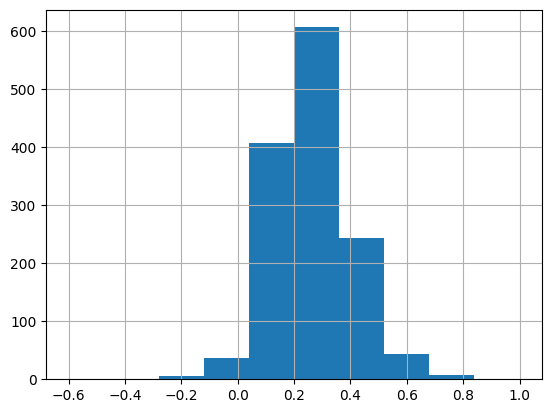

In [ ]:
from textblob import TextBlob
import pandas as pd
import numpy as np

df = pd.read_csv('/content/amazon.csv')

#O código foi criado para analisar o sentimento das avaliações de produtos na base de dados da Amazon. Utilizando o pacote TextBlob,
#ele calcula a polaridade do sentimento (positivo, negativo ou neutro) de cada avaliação de produto.

# Função para calcular o sentimento
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Aplicar a função nas avaliações
df['sentiment'] = df['review_content'].apply(get_sentiment)

# Analisar a distribuição dos sentimentos
df['sentiment'].hist()


In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


<Axes: >

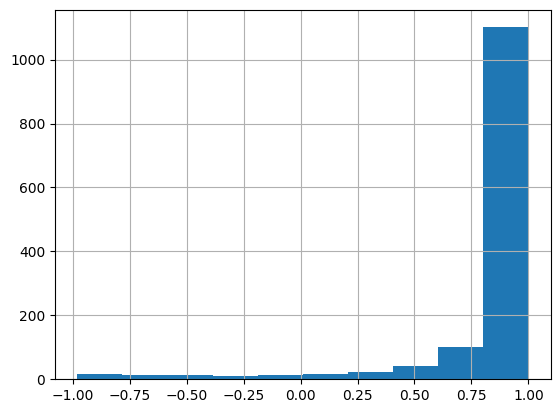

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#O código utiliza a biblioteca VADER Sentiment Analysis para analisar o sentimento das avaliações de produtos.
#Ele calcula a pontuação composta do sentimento (um valor que indica o sentimento geral) de cada avaliação de produto.

analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    vs = analyzer.polarity_scores(text)
    return vs['compound']

df['sentiment_vader'] = df['review_content'].apply(get_vader_sentiment)

df['sentiment_vader'].hist()


In [ ]:
import plotly.express as px

# Histograma de Sentimento
fig_hist = px.histogram(df, x='sentiment_vader', nbins=30, title='Distribuição de Sentimentos das Avaliações (VADER)',
                        labels={'sentiment_vader': 'Pontuação Composta de Sentimento'}, marginal='box')
fig_hist.update_layout(xaxis_title='Pontuação Composta de Sentimento', yaxis_title='Frequência')
fig_hist.show()

# Boxplot de Sentimento
fig_box = px.box(df, x='sentiment_vader', title='Boxplot da Pontuação de Sentimento das Avaliações (VADER)',
                 labels={'sentiment_vader': 'Pontuação Composta de Sentimento'})
fig_box.update_layout(xaxis_title='Pontuação Composta de Sentimento', yaxis_title='Distribuição')
fig_box.show()

# Calcular a média e o desvio padrão das pontuações de sentimento por categoria
category_sentiment = df.groupby('category')['sentiment_vader'].agg(['mean', 'std']).reset_index()

# Gráfico de Barras da Média de Sentimento por Categoria de Produto
fig_bar = px.bar(category_sentiment, x='category', y='mean', title='Média da Pontuação de Sentimento por Categoria de Produto',
                 labels={'category': 'Categoria de Produto', 'mean': 'Média da Pontuação Composta de Sentimento'},
                 error_y='std', color='category')

fig_bar.update_layout(xaxis_title='Categoria de Produto', yaxis_title='Média da Pontuação Composta de Sentimento', xaxis={'categoryorder':'total descending'})
fig_bar.show()
print(category_sentiment)



                category      mean       std
0          Car&Motorbike  0.986000       NaN
1  Computers&Accessories  0.849184  0.316267
2            Electronics  0.853852  0.335877
3    Health&PersonalCare  0.971900       NaN
4           Home&Kitchen  0.805739  0.386948
5        HomeImprovement  0.896850  0.138381
6     MusicalInstruments  0.997300  0.000849
7         OfficeProducts  0.797994  0.335830
8             Toys&Games  0.986700       NaN


**Car&Motorbike, Health&PersonalCare, e Toys&Games** têm as médias de sentimento mais altas (0.986, 0.9719 e 0.9867 respectivamente), indicando avaliações muito positivas. No entanto, esses valores têm um desvio padrão NaN, sugerindo que há uma falta de variabilidade nos dados ou que há poucos dados disponíveis.

**MusicalInstruments** também tem uma média de sentimento alta (0.9973) com um desvio padrão muito baixo (0.000849), indicando avaliações consistentemente positivas para produtos desta categoria.

**Computers&Accessories e Electronics** têm médias de sentimento de 0.849184 e 0.853852, respectivamente, com desvios padrão relativamente maiores (0.316267 e 0.335877), indicando uma maior variabilidade nas avaliações.

**Home&Kitchen e OfficeProducts** têm médias de sentimento mais baixas (0.805739 e 0.797994), com desvios padrão de 0.386948 e 0.335830, respectivamente, indicando que essas categorias podem ter avaliações mais mistas ou variadas.

**HomeImprovement** tem uma média de sentimento de 0.89685 com um desvio padrão de 0.138381, indicando avaliações geralmente positivas com alguma variabilidade.

In [ ]:
import plotly.express as px

# Agrupar por categoria e calcular a média e desvio padrão
summary_df = df.groupby('category_discount_segment').agg({
    'sentiment_vader': ['mean', 'std'],
    'rating': 'mean',
    'product_name': 'first',  # Pega a primeira descrição de cada categoria
    'about_product': 'first',
    'actual_price': 'mean',
    'discounted_price': 'mean',
    'discount_percentage': 'mean'
}).reset_index()

# Renomear colunas para melhorar a visualização
summary_df.columns = ['category_discount_segment', 'mean_sentiment', 'std_sentiment', 'mean_rating', 'product_name', 'about_product', 'mean_price', 'discounted_price', 'discount_percentage']

# Exibir o resumo para análise
print(summary_df)


  category_discount_segment  mean_sentiment  std_sentiment  mean_rating  \
0             High Discount        0.849761       0.315168     4.153968   
1              Low Discount        0.805615       0.383226     4.058750   
2           Medium Discount        0.854702       0.335029     4.076471   

                                        product_name  \
0  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  Classmate Octane Neon- Blue Gel Pens(Pack of 5...   
2  AmazonBasics Flexible Premium HDMI Cable (Blac...   

                                       about_product    mean_price  \
0  High Compatibility : Compatible With iPhone 12...   1852.255608   
1  5 vibrant Neon body color|Smooth and fast writ...   3910.566667   
2  Flexible, lightweight HDMI cable for connectin...  10368.265720   

   discounted_price  discount_percentage  
0        944.130582            53.246032  
1       2195.030854            38.243750  
2       6195.316430            49.874239  


In [ ]:
# Eliminar as variáveis fora de análise
df = df.drop(['has_about_product', 'product_link', 'img_link'], axis=1)

# Criar a variável de segmentação de sentimento
def sentiment_category(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_vader_category'] = df['sentiment_vader'].apply(sentiment_category)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   product_id                 1351 non-null   object 
 1   product_name               1351 non-null   object 
 2   category                   1351 non-null   object 
 3   discounted_price           1351 non-null   float64
 4   actual_price               1351 non-null   float64
 5   discount_percentage        1351 non-null   float64
 6   about_product              1351 non-null   object 
 7   user_id                    1351 non-null   object 
 8   user_name                  1351 non-null   object 
 9   review_id                  1351 non-null   object 
 10  review_title               1351 non-null   object 
 11  review_content             1351 non-null   object 
 12  rating                     1351 non-null   float64
 13  rating_count               1351 non-null   float

In [ ]:
df.to_csv('amazon1.csv', index=False)

In [61]:
import pandas as pd
df = pd.read_csv('/content/amazon1.csv')
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product,user_id,user_name,review_id,...,rating_segment,rating_count_segment,discounted_price_segment,actual_price_segment,combined_segment,category_cluster,has_image,sentiment,sentiment_vader,sentiment_vader_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399.0,1099.0,64.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",...,Medium Rating,High Review Count,Low Discounted Price,Medium Actual Price,Low Discounted Price & High Discount & Medium ...,0,True,0.481944,0.8974,positive
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,199.0,349.0,43.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",...,Low Rating,High Review Count,Low Discounted Price,Low Actual Price,Low Discounted Price & High Discount & Low Act...,0,True,0.274318,0.9853,positive
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,199.0,1899.0,90.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",...,Low Rating,Medium Review Count,Low Discounted Price,Medium Actual Price,Low Discounted Price & High Discount & Medium ...,0,True,0.600000,0.7089,positive
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,329.0,699.0,53.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",...,Medium Rating,High Review Count,Low Discounted Price,Low Actual Price,Low Discounted Price & High Discount & Low Act...,0,True,0.240370,0.8316,positive
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,154.0,399.0,61.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",...,Medium Rating,High Review Count,Low Discounted Price,Low Actual Price,Low Discounted Price & High Discount & Low Act...,0,True,0.262740,0.9955,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen,379.0,919.0,59.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",...,Low Rating,Low Review Count,Low Discounted Price,Low Actual Price,Low Discounted Price & Low Discount & Low Actu...,0,False,0.323810,0.9390,positive
1347,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen,2280.0,3045.0,25.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",...,Medium Rating,Medium Review Count,High Discounted Price,High Actual Price,High Discounted Price & Low Discount & High Ac...,0,False,0.142083,0.9473,positive
1348,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,Home&Kitchen,2219.0,3080.0,28.0,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",...,Low Rating,Low Review Count,High Discounted Price,High Actual Price,Hi

In [62]:
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.express as px
from scipy import stats
import plotly.graph_objects as go
import numpy as np

# Selecionar variáveis independentes e dependentes
X = df[['discounted_price', 'rating_count', 'discount_percentage', 'actual_price', 'sentiment_vader', 'category', 'has_image']]
y = df['rating']

# Transformar variáveis categóricas com one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['discounted_price', 'rating_count', 'discount_percentage', 'actual_price', 'sentiment_vader']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['category', 'has_image'])
    ])

# Pré-processar os dados antes de aplicar RFE
X_processed = preprocessor.fit_transform(X)

# Criação do modelo
model = LinearRegression()

# Seleção de features com RFE
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X_processed, y)

# Ajustar o modelo com as features selecionadas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformar novamente X_train e X_test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Adicionar a constante ao conjunto de dados
X_train_sm = sm.add_constant(X_train_processed[:, rfe.support_])
X_test_sm = sm.add_constant(X_test_processed[:, rfe.support_])

# Ajustar o modelo com as features selecionadas usando StatsModels
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Imprimir o sumário do modelo
print("\nSumário do Modelo", model_sm.summary())

# Ajustar o modelo com as features selecionadas
X_selected = pd.DataFrame(X_processed, columns=np.append(preprocessor.transformers_[0][2], preprocessor.transformers_[1][1].get_feature_names_out(['category', 'has_image'])))
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
model.fit(X_train.iloc[:, rfe.support_], y_train)

# Avaliar o modelo
y_pred = model.predict(X_test.iloc[:, rfe.support_])
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('='*100)
print(f"\nCoeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R²: {r2}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print('='*100)

# Criar um DataFrame para as features selecionadas e suas importâncias
features_df = pd.DataFrame({
    'Feature': X_selected.columns[rfe.support_],
    'Importance': model.coef_
})

# Gráfico de barras interativo para as features selecionadas
fig = px.bar(features_df, x='Feature', y='Importance',
             title='Importância das Features Selecionadas',
             labels={'Feature': 'Feature', 'Importance': 'Importância'},
             text='Importance')

# Melhorar a estética do gráfico
fig.update_layout(
    xaxis_title='Feature',
    yaxis_title='Importância',
    title_x=0.5  # Centralizar o título
)

# Exibir o gráfico
fig.show()

# Ordenar as features pela importância
top_5_features_df = features_df.sort_values(by='Importance', ascending=False).head(5)

# Gráfico de barras interativo para as top 5 features mais importantes
fig_top5 = px.bar(top_5_features_df, x='Feature', y='Importance',
                  title='Top 5 Features Mais Importantes',
                  labels={'Feature': 'Feature', 'Importance': 'Importância'},
                  text='Importance')

# Melhorar a estética do gráfico
fig_top5.update_layout(
    xaxis_title='Feature',
    yaxis_title='Importância',
    title_x=0.5  # Centralizar o título
)

# Exibir o gráfico
fig_top5.show()



Sumário do Modelo                             OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     17.56
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           7.03e-30
Time:                        03:05:04   Log-Likelihood:                -143.80
No. Observations:                1080   AIC:                             309.6
Df Residuals:                    1069   BIC:                             364.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0355      0.015 

**Conclusões e Recomendações**
Descontos e Ratings: Há uma relação negativa significativa entre a porcentagem de desconto e os ratings, sugerindo que maiores descontos podem ser percebidos como uma indicação de menor qualidade ou outros fatores negativos pelos consumidores.

**Sentimento e Ratings:** Sentimentos mais positivos (medidos pelo sentiment_vader) têm uma forte relação positiva com os ratings, o que reforça a importância de boas avaliações e experiências positivas para os consumidores.

**Preço Real e Descontado:** Embora disminucão no preço real estejam associados a ratings mais altos, o preço com desconto tem um impacto negativo. Isso pode sugerir que produtos mais caros são percebidos como de maior qualidade, mas grandes descontos podem levantar suspeitas sobre a qualidade.

**Com Imagem:** Produtos com imagem está associado a ligeiros aumentos nos ratings, indicando que produtos com mais informação tendem a ser mais confiáveis.

**Categorias Home Improvement e Office Products** Disminução nestas categorias, têm uma forte relação positiva com os ratings.

**Considerações Finais**

**Melhorar a Qualidade:** Foco em melhorar a qualidade percebida dos produtos, especialmente aqueles com grandes descontos, pode ajudar a aumentar os ratings.
**Experiência do Cliente:** Promover boas experiências do cliente e incentivar avaliações positivas é crucial para melhorar os ratings gerais.
**Estratégias de Preço:** Reavaliar as estratégias de desconto para garantir que não impactem negativamente a percepção do consumidor sobre a qualidade dos produtos.